<a href="https://colab.research.google.com/github/jimmy-qiu-essketit/Loan-Default-Prediction-Model/blob/master/Default_Model_BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')
#!ls "/content/drive/My Drive"
! wget -c -O big.file https://drive.google.com/drive/u/0/my-drive


**Foreword**

In this model I have built using Python, I explore using machine learning to predict whether a borrower will default on their unsecured loan, before they are issued the loan. This is model is applicable to the pre-screening process for lenders issuing unsecured loans. The application of machine learning allows lenders to derive more accurate insights about the probability of default for any individual than they would otherwise be able to using a simple system of Fico-score thresholds. 

The advantages of machine learning is compelling because it is able to identify patterns in high-dimension data relating to default probability, that would otherwise not be considered in a simple threshold system. A more accurate predictive model allows lenders to make better lending decisions, reducing bad loans and reducing missed opportunities.



---


**Data Exploration**

The first step of building the model is importing the necessary Python libraries and loading our training data from .csv format. The libraries I use in this model are Pandas for data manipulation and SciKit-Learn for its ML algorithims.



In [0]:
#Import libraries
import pandas as pd

#read file from csv using 
file = pd.read_csv('/content/drive/My Drive/Loan_default_data.csv')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 10000)

Display the first and last 10 rows of the file we just imported. 


In [25]:
file.head(10)

,Unnamed: 0,loan_start_date,original_loan_amt,cv_link_score,cra_oldest_trade,cra_num_foreclosures,cra_num_repos,cra_num_derogs,cra_num_90_plus_12,cra_num_charge_offs,cra_num_past_due,cra_num_total_collections,cra_num_credit_inquiries_last_6,email_count,mobile_count,bs_mismatch_ind,bs_name_mismatch_ind,month_on_book,days_past_due,loan_status,charge_off_dol,charge_off_type,credit_limit,vertical,loan_terms,loan_apr,cra_fico,loan_no
0,1,2017-10-17,455.98,703,154,0,0,0,0,0,0,0,2,1,1,0,0,12,0,Paid,0.0,NaN,4115,3,24.0,0.0754,776.0,6.931472e+09
1,2,2017-10-17,455.98,703,154,0,0,0,0,0,0,0,2,1,1,0,0,12,0,Paid,0.0,NaN,4115,3,18.0,0.0754,776.0,2.054280e+14
2,3,2017-10-17,455.98,703,154,0,0,0,0,0,0,0,2,1,1,0,0,11,0,Paid,0.0,NaN,4115,3,24.0,0.0754,776.0,6.931472e+09
3,4,2017-10-17,455.98,703,154,0,0,0,0,0,0,0,2,1,1,0,0,11,0,Paid,0.0,NaN,4115,3,18.0,0.0754,776.0,2.054280e+14
4,5,2017-10-17,455.98,703,154,0,0,0,0,0,0,0,2,1,1,0,0,4,0,Paid,0.0,NaN,4115,3,24.0,0.0754,776.0,6.931472e+09
5,6,2017-10-17,455.98,703,154,0,0,0,0,0,0,0,2,1,1,0,0,4,0,Paid,0.0,NaN,4115,3,18.0,0.0754,776.0,2.054280e+14
6,7,2017-10-17,455.98,703,154,0,0,0,0,0,0,0,2,1,1,0,0,6,0,Paid,0.0,NaN,4115,3,24.0,0.0754,776.0,6.931472e+09
7,8,2017-10-17,455.98,703,154,0,0,0,0,0,0,0,2,1,1,0,0,6,0,Paid,0.0,NaN,4115,3,18.0,0.0754,776.0,2.054280e+14
8,9,2017-10-17,455.98,703,154,0,0,0,0,0,0,0,2,1,1,0,0,7,0,Paid,0.0,NaN,4115,3,24.0,0.0754,776.0,6.931472e+09
9,10,2017-10-17,455.98,703,154,0,0,0,0,0,0,0,2,1,1,0,0,7,0,Paid,0.0,NaN,4115,3,18.0,0.0754,776.0,2.054280e+14


In [26]:
file.tail(10)

,Unnamed: 0,loan_start_date,original_loan_amt,cv_link_score,cra_oldest_trade,cra_num_foreclosures,cra_num_repos,cra_num_derogs,cra_num_90_plus_12,cra_num_charge_offs,cra_num_past_due,cra_num_total_collections,cra_num_credit_inquiries_last_6,email_count,mobile_count,bs_mismatch_ind,bs_name_mismatch_ind,month_on_book,days_past_due,loan_status,charge_off_dol,charge_off_type,credit_limit,vertical,loan_terms,loan_apr,cra_fico,loan_no
637480,637481,2017-06-15,1769.95,639,53,0,0,0,0,0,0,0,1,1,1,0,0,16,36,30 DPD,0.00000,NaN,2000,9,30.0,0.2254,670.0,2.755884e+14
637481,637482,2017-06-15,1769.95,639,53,0,0,0,0,0,0,0,1,1,1,0,0,16,36,30 DPD,0.00000,NaN,2000,9,30.0,0.2254,670.0,3.171772e+14
637482,637483,2017-06-15,1769.95,639,53,0,0,0,0,0,0,0,1,1,1,0,0,16,36,30 DPD,0.00000,NaN,2000,9,36.0,0.2254,670.0,1.571642e+14
637483,637484,2017-12-04,1500.00,563,215,0,0,0,0,0,0,0,3,1,1,0,0,0,0,Current,0.00000,CONTRACTUAL,1500,8,6.0,0.2254,665.0,1.571711e+14
637484,637485,2017-12-04,1500.00,563,215,0,0,0,0,0,0,0,3,1,1,0,0,1,0,Current,0.00000,CONTRACTUAL,1500,8,6.0,0.2254,665.0,1.571711e+14
637485,637486,2017-12-04,1500.00,563,215,0,0,0,0,0,0,0,3,1,1,0,0,2,5,1 DPD,0.00000,CONTRACTUAL,1500,8,6.0,0.2254,665.0,1.571711e+14
637486,637487,2017-12-04,1500.00,563,215,0,0,0,0,0,0,0,3,1,1,0,0,3,5,1 DPD,0.00000,CONTRACTUAL,1500,8,6.0,0.2254,665.0,1.571711e+14
637487,637488,2017-12-04,1500.00,563,215,0,0,0,0,0,0,0,3,1,1,0,0,4,36,30 DPD,0.00000,CONTRACTUAL,1500,8,6.0,0.2254,665.0,1.571711e+14
637488,637489,2017-12-04,1500.00,563,215,0,0,0,0,0,0,0,3,1,1,0,0,5,66,60 DPD,0.00000,CONTRACTUAL,1500,8,6.0,0.2254,665.0,1.571711e+14
637489,637490,2017-12-04,1500.00,563,215,0,0,0,0,0,0,0,3,1,1,0,0,6,97,90 DPD,1020.45328,CONTRACTUAL,1500,8,6.0,0.2254,665.0,1.571711e+14


Describe the data set.

In [27]:
file.describe()

,Unnamed: 0,original_loan_amt,cv_link_score,cra_oldest_trade,cra_num_foreclosures,cra_num_repos,cra_num_derogs,cra_num_90_plus_12,cra_num_charge_offs,cra_num_past_due,cra_num_total_collections,cra_num_credit_inquiries_last_6,email_count,mobile_count,bs_mismatch_ind,bs_name_mismatch_ind,month_on_book,days_past_due,charge_off_dol,credit_limit,vertical,loan_terms,loan_apr,cra_fico,loan_no
count,637490.00000,637490.000000,637490.000000,637490.000000,637490.000000,637490.000000,637490.000000,637490.000000,637490.000000,637490.000000,637490.000000,637490.000000,637490.000000,637490.000000,637490.000000,637490.000000,637490.000000,637490.000000,637490.000000,637490.000000,637490.000000,636499.00000,636499.000000,636499.000000,6.364990e+05
mean,318745.50000,1464.169995,600.769910,182.693498,0.000858,0.002527,0.157938,0.045430,0.013442,0.024234,0.612272,1.807977,1.205817,1.139050,0.092337,0.006090,6.289225,5.204577,46.508986,3467.400808,4.952024,21.74854,0.164157,697.675214,1.732502e+14
std,184027.65589,1449.384913,198.911005,101.026060,0.033197,0.050207,0.560344,0.482705,0.166383,0.273875,1.846220,3.065449,0.780128,0.523641,0.289502,0.077797,4.312368,21.801855,346.118772,2681.532073,3.297329,9.23257,0.088656,67.322467,9.794855e+13
min,1.00000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.00000,0.024600,3.000000,6.931472e+09
25%,159373.25000,505.940000,616.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1750.000000,3.000000,12.00000,0.085400,654.000000,8.976949e+13
50%,318745.50000,1100.000000,655.000000,165.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000,2500.000000,5.000000,18.00000,0.175400,693.000000,1.751444e+14
75%,478117.75000,1915.730000,694.000000,231.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,9.000000,0.000000,0.000000,5000.000000,6.000000,30.00000,0.275400,738.000000,2.565546e+14
max,637490.00000,15000.000000,809.000000,744.000000,3.000000,1.000000,31.000000,25.000000,11.000000,14.000000,42.000000,47.000000,89.000000,14.000000,1.000000,1.000000,21.000000,278.000000,12011.000000,25000.000000,13.000000,48.00000,0.275400,853.000000,3.443209e+14


In [28]:
print("Num of Columns:", len(file.columns))
print("Num of Rows", len(file))

Num of Columns: 28
Num of Rows 637490


**Column Meanings**

From above, we get a view of what the data set looks like. Unfortunately, due the source of the data set did not provide a description of the meaning of the columns. I did some research as to what each column means and used my personal judgement to deduce their meaning.  

Unamed: 0 --> Due to the chronological order of this column, and that the max value matches the count. I deduced this column is the row number.

loan_start_date --> When the loan starts?

original_loan_amt --> Judging by the name, this is the the amount of the loan.

cv_link_score --> Quick google search tells us that this stands for "Credit View Link", which is a score generated by an independent credit rating agency. 

cra_oldest_trade --> CRA probably stands for "Credit Rating Agency", but I am not sure what "oldest_trade" means. Google is not helpful for this. The values range between 0 and 744. Which is similar to the range of cv_link_score, and also has similar std dev. My guess, this is probably another credit rating provided by another agency.

cra_num_foreclosures --> This is probably how many foreclosures that an individual has. 

cra_num_repos --> This is another data point provided by the credit rating agency. Not sure what repos mean. But it seems that this is binary column of 0 and 1. 

cra_num_derogs 	--> From Google: "A derogatory item is considered negative, and typically indicates a serious delinquency or late payments."

cra_num_90_plus_12 	--> Not sure what this stands for, most likely is a metric tracked by the rating agency. 

cra_num_charge_offs --> Charge offs means default, since it is a metric provided by the CRA, I believe this relates to the number of previous charge-offs. 

cra_num_past_due 	--> Possibly to related to numbers of day past due on other loans?

cra_num_total_collections --> Previous number of collections

cra_num_credit_inquiries_last_6 	--> Previous number of credit checks

email_count 	--> Not sure what this means.

mobile_count 	bs_mismatch_ind --> Not sure what this means

bs_name_mismatch_ind 	--> Not sure what this means

month_on_book 	--> How long the long has been on the book for

days_past_due  --> How long the loan is past due

loan_status --> Has the loan been defaulted on, charged off = defaulted. 

charge_off_dol 	--> How much was left on the loan when it was defaulted on.

charge_off_type --> reason for the default
	
loan_apr 	--> Interest rate

cra_fico 	--> credit score 

loan_no --> unique identifier for loan



In [29]:
print("Number Of Unique Values in loan_no:",len(file.loan_no.unique()))

Number Of Unique Values in loan_no: 49676


**First Impressions Of Data**

My first impression of the dataset was that there was probably a time-series involved in this dataset, meaning that rows within the dataset may be related to each other, given that there was a column called “month_on_book”. I believe the dataset is structured in that each row represents the "status" of a specific loan for that month. For example if a loan is for 12 months, each row represents one month of that loan.

To test out this hypothesis that the dataset is a time-series, I found the number of unique values in the “loan_no” column which was 49,676. This is lower than  the length of the dataframe which is 637,490 rows long. This proves that my time-series hypothesis has some truth, as loan_no is a unique identifier and if the length of the column is 637, 490 rows long, but there are only 49,676 unique values, that means that the unique identifier has been repeated.

Below, I sorted the data frame first by “loan_no” and then by “month_on_book”, to group together the same loans in chronological order so it is easier to work with. I picked a few columns to display, in order to make it easier to view. 

As you can see in the output below, I was correct in my time-series assumption. When the dataframe is sorted, everything lines up. Each unique loan_no group has a chronological month_on_book starting from 0 to x months. 




In [30]:
file = file.sort_values(by=['loan_no', 'month_on_book'])
loans_etc = file[['loan_start_date', 'month_on_book', 'loan_status', 'charge_off_type', 'charge_off_dol', 'loan_no']]
loans_etc['loan_no'] = loans_etc['loan_no'].apply(str) 
loans_etc.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,loan_start_date,month_on_book,loan_status,charge_off_type,charge_off_dol,loan_no
18,2017-10-17,0,Current,NaN,0.0,6931471806.0
24,2017-10-17,1,Paid,NaN,0.0,6931471806.0
12,2017-10-17,2,Paid,NaN,0.0,6931471806.0
10,2017-10-17,3,Paid,NaN,0.0,6931471806.0
4,2017-10-17,4,Paid,NaN,0.0,6931471806.0
14,2017-10-17,5,Paid,NaN,0.0,6931471806.0
6,2017-10-17,6,Paid,NaN,0.0,6931471806.0
8,2017-10-17,7,Paid,NaN,0.0,6931471806.0
20,2017-10-17,8,Paid,NaN,0.0,6931471806.0
16,2017-10-17,9,Paid,NaN,0.0,6931471806.0


Below, we can see that a loan for each month can have a status of “Current” or “Paid” or “1DPD” or '30 DPD' or '60 DPD' or '90 DPD' or 'Charged Off'. Current means that the individual is keeping up with payments, Paid means the borrower returned all the money in the loan, DPD means that they are late on payments, and Charged Off means that the borrowers missed enough payments that the loan is expected to be not recoverable. 

The “charge_off_type” for each row is showing what happened in the future to the loan, whether it was paid off or remained current (represented as Null/Nan) or it was charged off which can be due to contractual, fraud, bankruptcy, or deceased. 

In [31]:
print("Unique values in loan_status:", file['loan_status'].unique())
print("Unique values in charge_off_type :", file['charge_off_type'].unique())

Unique values in loan_status: ['Current' 'Paid' '1 DPD' '30 DPD' '60 DPD' '90 DPD' 'Charged Off']
Unique values in charge_off_type : [nan 'CONTRACTUAL' 'FRAUD' 'BANKRUPT' 'DECEASED']


**Non-Defaulted Loan**

For the first loan: “6931471806.0” had a loan_term of 24 months, but was repaid after the first month.

Since it was paid by the borrower, it made sense that the charge_off_dol amount was 0 and that the charge_off_type is null, since no charge_off happened. I also noticed that despite being paid, the loan remained on the books for almost 12 months. 


In [32]:
loans_etc2 = loans_etc.loc[loans_etc['loan_no'] == "6931471806.0"]
loans_etc2.head(1000)

,loan_start_date,month_on_book,loan_status,charge_off_type,charge_off_dol,loan_no
18,2017-10-17,0,Current,NaN,0.0,6931471806.0
24,2017-10-17,1,Paid,NaN,0.0,6931471806.0
12,2017-10-17,2,Paid,NaN,0.0,6931471806.0
10,2017-10-17,3,Paid,NaN,0.0,6931471806.0
4,2017-10-17,4,Paid,NaN,0.0,6931471806.0
14,2017-10-17,5,Paid,NaN,0.0,6931471806.0
6,2017-10-17,6,Paid,NaN,0.0,6931471806.0
8,2017-10-17,7,Paid,NaN,0.0,6931471806.0
20,2017-10-17,8,Paid,NaN,0.0,6931471806.0
16,2017-10-17,9,Paid,NaN,0.0,6931471806.0


**Defaulted Loan**

Below you can see all of the months for the loan: 62383246250.0, which was charged off at the end of month 10 due to a contractual charge-off, and that the charge-off dollar amount was 1944.75. 

What is interesting here is in the row for month 0, we already know that the loan was charged off, because the charge_off_column shows "CONTRACTUAL" and not NaN like for loan 6931471806.0, which was paid off. This is called data leakage because it is leaking information form the feature. I believe that we can take advantage of this leakage when it comes to determing the dependent or target variable.

At this point, I had an idea of what the structure of the model. Since the business question is phrased as “build a Probability of Default (PD) model”. Given that there are only two (binary) options, “default” and “no default”, this problem can be tackled with a classification model. 



In [33]:
loans_etc2 = loans_etc.loc[loans_etc['loan_no'] == "62383246250.0"]
loans_etc2.head(100)

,loan_start_date,month_on_book,loan_status,charge_off_type,charge_off_dol,loan_no
272,2017-12-21,0,Current,CONTRACTUAL,0.00000,62383246250.0
252,2017-12-21,1,Current,CONTRACTUAL,0.00000,62383246250.0
262,2017-12-21,2,Current,CONTRACTUAL,0.00000,62383246250.0
277,2017-12-21,3,Current,CONTRACTUAL,0.00000,62383246250.0
267,2017-12-21,4,1 DPD,CONTRACTUAL,0.00000,62383246250.0
247,2017-12-21,5,30 DPD,CONTRACTUAL,0.00000,62383246250.0
282,2017-12-21,6,60 DPD,CONTRACTUAL,0.00000,62383246250.0
257,2017-12-21,7,90 DPD,CONTRACTUAL,0.00000,62383246250.0
292,2017-12-21,8,Charged Off,CONTRACTUAL,1944.75235,62383246250.0
297,2017-12-21,9,Charged Off,CONTRACTUAL,1944.00000,62383246250.0



**Choosing The Target Variable**

With a classification model, there must be a target variable which represents default. Initially there were three candidate columns for the target variable, as they all provided some clue to whether the loan defaulted or not. The three columns are ‘loan_status’, ‘charge_off_dol’, and ‘charge_off_type’. 

I chose ‘charge_off_type’ as the target variable for a couple of reasons, the first of which it clearly distinguished which loans were defaulted. Null represented loans which were not defaulted, and the other options (“Fraud”, “Contractual”, “Bankruptcy”, “Deceased”) all represented a form of default, since loans that had one of these options where all charged off, and when a loan is charged off it means that the company has deemed it unlikely to be recovered. Thus, I mapped “Null” to 0 and “Not Null” to 1, representing “default” and “no default”. 

The second reason I chose this column was because it was convenient to use. For this business application, I assumed that the company is looking to predict whether a loan will default before actually making the loan, in order to prevent bad loans from occurring. They will have only access to the information represented in the “month_on_book” 0 row for each individual loan, and all of the other future months would not be used in the model, since that information would not be available at the time of making the loan. 

The “Charge_off_type” is convenient for this application, because for the “month_on_book” 0 row it tells us whether the loan end up defaulting or not, while “loan_status” and “charge_off_dol” only gives that indication in the future months when the loan actually defaults. There is a workaround to this problem for both “loan_status” and “charge_off_dol”, however it would require extra work and computing time that would make no sense in this context. 


In [0]:
#sort values by loan_no and month_on_book
file_1 = file.sort_values(['loan_no','month_on_book'])

#only take the first month of each loan
file_1 = file_1.loc[file_1['month_on_book'] == 0]

#Select the target variable
y = file_1['charge_off_type']

#map target variable into 0 and 1 for default and no default
y = y.fillna(0)
y.loc[y != 0] = 1

**Feature Selection**


I did some manual feature selection process for building this model. The key part to feature selection was to ensure that none of the features would leak information into the model that would otherwise be unavailable when the model is actually deployed. Leaking information, means training the model on information from the future. Also, another goal of feature selection was to remove features which were not relevant to training the model or did not add information. The less features the better, as it would prevent overfit on a more complex model. The features I chose to use to train the model are the following:

'original_loan_amt', 'cv_link_score', 'cra_oldest_trade', ‘cra_num_foreclosures', 'cra_num_repos', 'cra_num_derogs','cra_num_90_plus_12', 'cra_num_charge_offs', 'cra_num_past_due', 'cra_num_total_collections', 'cra_num_credit_inquiries_last_6',
 'credit_limit', 'loan_terms', 'cra_fico'

These were the features that I believed qualified for both criterias, which is not leaking information and also provides information. The original loan amount qualifies because we should know how much the borrower is applying for. The CV_link score is a credit score which is available at time of application. The CRA related features are from the credit report which is available at the beginning of the application. Other features like credit_limit and loan_terms are typically negotiated at the beginning of the application process.

The features I did not include in the training dataset are:

'Unnamed: 0', 'loan_start_date', 'month_on_book', 'loan_status', 'charge_off_dol', 'charge_off_type','loan_no', 'email_count', 'mobile_count', 'bs_mismatch_ind', 'days_past_due' , 'loan_apr', 'vertical'

Features that add no value:

●	Unnamed: 0 → this is an index feature that has no correlation with the target 

●	Loan_start_date' → When the loan was issued, not relevant because this a backwards looking feature. All of our loans will be originated in the future.

●	Month_on_book → not relevant, because all of the values will be 0, since we are only training the model based on month 0

●	Loan_status → not relevant

●	Charge_off_dol → not relevant

●	Charge_off_type → not relevant, because this is our target variable

●	Loan_no → not relevant because this is just an identifier for each loan

Features that might leak information or would not be available in actual deployment:

●	Email_count → not sure what this feature is describing so I took it out, because I was not sure whether it would be available on month 0 in actual deployment. 

●	Mobile_count: same reason as above

●	Bs_mismatch_id: same reason as above

●	Bs_name_mismatch_ind: same reason as above


In [0]:
#columns to drop
to_drop = ['Unnamed: 0','loan_start_date','month_on_book', 'loan_status', 
           'charge_off_dol', 'charge_off_type','loan_no','bs_mismatch_ind','days_past_due'
          ,'loan_apr','vertical','bs_name_mismatch_ind','email_count','mobile_count']

#split dataset into dependent and independent variable
X = file_1.drop(to_drop, axis=1)

Split dataset into training and testing set

In [0]:
#split into training and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

The model I chose in this case was a decision tree classifier model, since it was a good balance between performance and explainability. A very complex model like a neural network would be very difficult to explain, but could have higher performance in accuracy and recall. If this model was actually meant to be deployed, I would have explored more complex models to maximize performance, but for the purpose of this project I wanted a more explainable model so I can do some additional analysis.


In [37]:
#train model classifier
from sklearn.tree import DecisionTreeClassifier
classify = DecisionTreeClassifier()
classify.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Test the trained classifer on the test set. As you can observe the overall accuracy of the model is very high at 97%. Meaning that 97% of all test cases were correctly classified.




In [38]:
#test classifier --> predict
y_pred = classify.predict(X_test)

#test classifer --> loan default probability
y_dprob = classify.predict_proba(X_test)

from sklearn.metrics import accuracy_score
#print accuracy of test
print("The accuracy of the model is ", accuracy_score(y_test, y_pred)*100)


The accuracy of the model is  96.98041847129872


However, as you dig deeper, the precision and recall of the “1” class (representing default) is significantly lower than that of the “0” class (representing no-default). Precision is calculated as True Positives / (True Positives + False Positives) and Recall is calculated as True Positives / (True Positives + False Negatives). In simpler terms, an 80% precision score means that out of all the samples predicted to be positive, 80% were actually positives. So 20% of predicted positives were actually negatives. Precision matters if the cost of misclassifying a negative as positive is very high. Recall means that out of the samples which are actually positive, 83% of those actually positive samples were classified as positive. Recall matters more if the cost of missing a positive sample is very high. 

[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

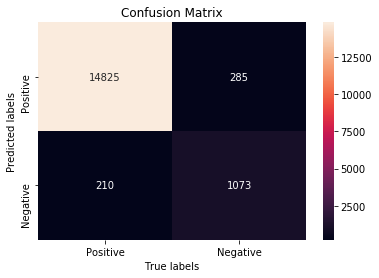

In [39]:
#print confusion matrix
from sklearn.metrics import confusion_matrix
matrix_out = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt     

#matrix_out = format(matrix_out, 'f')

ax= plt.subplot()
sns.heatmap(matrix_out, annot=True, ax = ax, fmt='g')

ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Positive', 'Negative'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])


In [40]:
#print classification metrics
from sklearn.metrics import recall_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     15110
           1       0.79      0.84      0.81      1283

    accuracy                           0.97     16393
   macro avg       0.89      0.91      0.90     16393
weighted avg       0.97      0.97      0.97     16393



Feature importance shows how effective is the specific feature at separating default and no-defaults.

In [41]:
#print feature importance
feat_import = pd.DataFrame(classify.feature_importances_, columns=['Feature Importance'])
x_col = pd.DataFrame(X.columns, columns = ['Feature'])
feat_import = pd.concat([x_col, feat_import], axis=1)
print(feat_import.sort_values(['Feature Importance'], ascending=False))

                            Feature  Feature Importance
2                  cra_oldest_trade            0.192805
0                 original_loan_amt            0.185749
1                     cv_link_score            0.170735
13                         cra_fico            0.153445
10  cra_num_credit_inquiries_last_6            0.094428
11                     credit_limit            0.085723
12                       loan_terms            0.044195
9         cra_num_total_collections            0.043658
5                    cra_num_derogs            0.014710
8                  cra_num_past_due            0.005043
6                cra_num_90_plus_12            0.004534
7               cra_num_charge_offs            0.003521
4                     cra_num_repos            0.001454
3              cra_num_foreclosures            0.000000


In the chart below, I show a histogram of the distribution of "CRA Oldest Trade" which is the has the highest feature importance score. As can be clearly seen, the distribution of this feature is not normal. It resembles a normal distribution, but has a long tail to the right, and a slight hump on the left.

Text(0.5, 1.0, 'CRA Oldest Trade')

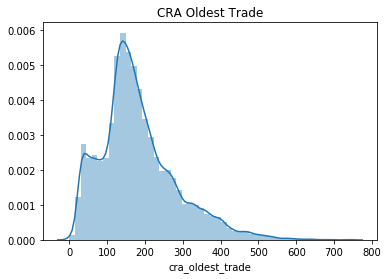

In [42]:
ax2 = plt.subplot()
sns.distplot(file_1['cra_oldest_trade'], ax = ax2)
ax2.set_title('CRA Oldest Trade')

When we compare the mean and median of CRA oldest trade for the loans that defaulted and the ones that did not default. We can see that the mean and median of the loans that did not default is higher than those that did. Although we do not know what this feature stands for, we can infer that there is a positive relationship between this feature and not defaulting.

Text(0, 0.5, 'CRA Oldest Trade')

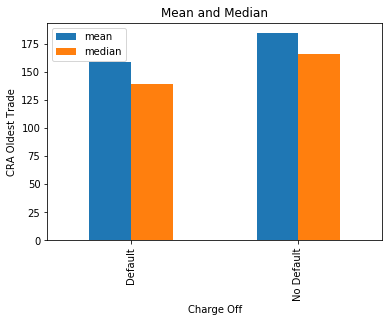

In [43]:
original_loan_amt = pd.DataFrame(file_1['cra_oldest_trade']).reset_index(drop=True)
#original_loan_amt.loan_no = original_loan_amt.loan_no.apply(str)
y = pd.DataFrame(y)
y = y.reset_index(drop=True)
y.loc[y['charge_off_type'] == 0] = 'No Default'
y.loc[y['charge_off_type'] == 1] = "Default"
new_df = pd.concat([original_loan_amt,y], axis=1)
new_df_median = new_df.groupby(['charge_off_type']).median()
new_df_mean = new_df.groupby(['charge_off_type']).mean()

chart_df = pd.concat([new_df_mean['cra_oldest_trade'].rename('mean'), new_df_median['cra_oldest_trade'].rename('median')], axis=1)

ax3 = chart_df.plot.bar()
ax3.set_title('Mean and Median')
ax3.set_xlabel('Charge Off')
ax3.set_ylabel('CRA Oldest Trade')


In the chart below, we can see that the distribution is fairly similar for both the loans that defaulted and did not default, even though the median and means are different.

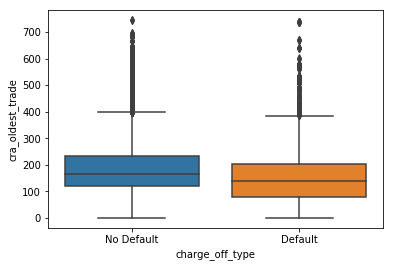

In [44]:
ax4 = sns.boxplot(x="charge_off_type", y="cra_oldest_trade", data=new_df)

**Validation**

I validated the model that I just trained using a test sample set. The test and training sample sets are randomly split from the original dataset. The model’s outputs from predicting on the test features, are compared with the actual test classes to determine how accurate the model is. If I had more time to do this project, I would have utilized a cross-validation technique instead of a random split. Cross-validation, trains and tests the model on different sections of the dataset, until all of the samples have been included in both the train and test set. Then a score is averaged out for all the test samples. This is a more accurate way of determining the accuracy of the model, because it has been tested on all the data.

Lastly, the final validation would to be actually deploy the model and see how it performs on actual new loans. Typically if the dataset that was provided is a good sample of the overall population, then the model’s deployment accuracy should be close to that of its Cross-validation accuracy. If the dataset that was used to train the model on is not good, then the deployment accuracy would be significantly lower than the Cross validation accuracy.

Obviously, getting the deployment accuracy would take several months to happen, because we would have to wait for the new loans to be either paid off or charged off to get the accuracy data for the models. Thus it might be prudent to train multiple different models using different samples and model techniques, and then deploy them on new loans. However, because the models are unproven, the lender should continue using their existing predictive methods and ignore the model’s predictions for a period of time. After a few month, there should be enough data to determine the accuracy of the model. If the model is highly accurate compared to the existing predictive methods, then it should be deployed, if the model is not accurate compared to the existing predictive methods, then it should be reworked. Hypothesis testing can be used to determine the significance of the improvement in accuracy.
